This is the main notebook regrouping all the informations used in the project.

# Import Libraries


In [ ]:
!pip install langdetect

!pip install emoji

!pip install transformers

!pip install scikit-learn

!pip install torchmetrics

     |████████████████████████████████| 981 kB 12.6 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=77f9313772a9f18e574c63282477b9745bac62054b119bdd34042bc480606f09
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
     |████████████████████████████████| 175 kB 9.3 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=7ad484599f62a7327174fbd41c58b85983eab179ef4f79eb403d7ae42d2eca30
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
     |████████████████████████████████| 4.0 MB 11.7 MB/s 
     |████████████████████████████████| 77 kB 5.4 MB/s 
     |████████████████████████████████| 6.5 MB 35.5 MB/s 
     |████████████████████████████████| 895 kB 14.1 MB/s 
     |████████████████████████████████| 596 kB 35.3 MB/s 
  Attempting uninsta

In [ ]:
import pandas as pd 

import numpy as np 

import seaborn as sns

import datetime

import matplotlib.pyplot as plt; plt.rcdefaults() 

import matplotlib.pyplot as pl

import os 

import csv 

import regex as re

from langdetect import detect

import emoji

from transformers import RobertaTokenizer, AutoTokenizer

import operator

import nltk

import sklearn

from sklearn.utils.class_weight import compute_class_weight

from sklearn.utils.class_weight import compute_class_weight

from sklearn.metrics import f1_score, accuracy_score

import torch

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

from transformers import RobertaForSequenceClassification, RobertaTokenizer, AutoTokenizer

from statsmodels.tsa.stattools import grangercausalitytests

from scipy import stats

from torch import nn

import torchmetrics

import transformers

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score

from transformers import AutoTokenizer,AutoModelForSequenceClassification
import plotly.graph_objects as go

nltk.download('vader_lexicon')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# Import and Explore Datasets

##Dataset (KAGGLE Short Time Frame)

###Import

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
dta = pd.read_csv('/content/gdrive/My Drive/NLP Group Project (2022)/tweet_datasets/Kaggle_tweets_S_T_F.csv')

###Data Exploration

#### Number of Tweets over Time

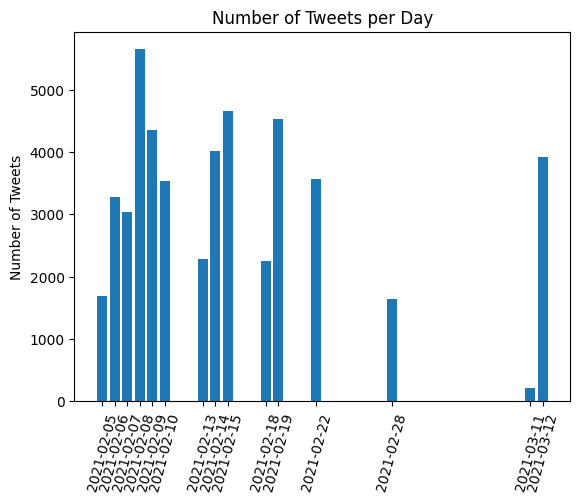

In [ ]:
# Convert Date Column to DATE
dta['date'] = pd.to_datetime(dta["date"])

# Remove time stamp 
dta['date'] = pd.to_datetime(dta['date']).dt.date

# Sort Tweets by date 
dta_date_sorted = dta.sort_values(by = ['date'], ascending= True)

# unique dates
dta_counts = dta_date_sorted.groupby(['date']).size().reset_index(name='counts')

# Make counts
plt.bar(dta_counts['date'], dta_counts['counts'])
plt.xticks(dta_counts['date'])
plt.xticks(rotation = 75) 
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Day')

plt.show()

##Dataset (KAGGLE Long Time Frame)

###Import

In [ ]:
dta_LT_label = pd.read_excel('/content/gdrive/My Drive/NLP Group Project (2022)/tweet_datasets/Kaggle_tweets_L_T_F_20000.xlsx')

###Data Exploration

####Number of Tweets over Time 

In [ ]:
# Convert Date Column to DATE
dta_LT_label['date'] = pd.to_datetime(dta_LT_label["date"])

# Remove time stamp 
dta_LT_label['date'] = pd.to_datetime(dta_LT_label['date']).dt.date

# Sort Tweets by date 
dta_LT_date_sorted = dta_LT_label.sort_values(by = ['date'], ascending= True)

# unique dates
dta_LT_counts = dta_LT_date_sorted.groupby(['date']).size().reset_index(name='counts')


In [ ]:
fig = go.Figure(go.Bar(x = dta_LT_counts['date'], y = dta_LT_counts['counts']))
fig.update_layout(title='Number of Tweets per day')
fig.update_yaxes(
        title_text = "Number of Tweets")
fig.show()

##Dataset (Kaggle Continuous Time Frame)

###Import

In [ ]:
dta_cont = pd.read_csv('/content/gdrive/My Drive/NLP Group Project (2022)/tweet_datasets/Kaggle_tweets_continuous.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
dta_cont.head()

,date,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,is_retweet
0,2021-07-23 23:58:11,@StableGenius.com,"New Jersey, USA",NaN,2009-09-27 04:49:41,295.0,593.0,42665.0,False,Percent of Total Population that has Received ...,"['CovidVaccine', 'BlackTwitter']",Twitter Web App,False
1,2021-07-23 23:57:52,🌺RefuseNick🌺,.You know where I am fed boi.,...Every day is a good day to live and die for...,2021-02-27 19:31:44,148.0,815.0,5150.0,False,Its all a HOAX and is not about a virus.\n#Can...,"['Canada', 'USA', 'CovidVaccine']",Twitter for Android,False
2,2021-07-23 23:56:21,🌺RefuseNick🌺,.You know where I am fed boi.,...Every day is a good day to live and die for...,2021-02-27 19:31:44,148.0,815.0,5150.0,False,Freemasons obey your reptilian overlords:\nYou...,"['USA', 'Canada', 'CovidVaccine']",Twitter for Android,False
3,2021-07-23 23:55:21,🌺RefuseNick🌺,.You know where I am fed boi.,...Every day is a good day to live and die for...,2021-02-27 19:31:44,148.0,815.0,5150.0,False,Freemasons doing what freemasons do:\nhttps://...,"['USA', 'Canada', 'CovidVaccine']",Twitter for Android,False
4,2021-07-23 23:51:29,Colin Hughes,Wadjuk Bibbulmin in Noongar,"Grandfather, social conscience, actor/singer, ...",2014-03-26 08:59:32,883.0,1222.0,27714.0,False,@JohnRHewson Sadly according to interviews wit...,['CovidVaccine'],Twitter for Android,False


###Data Exploration

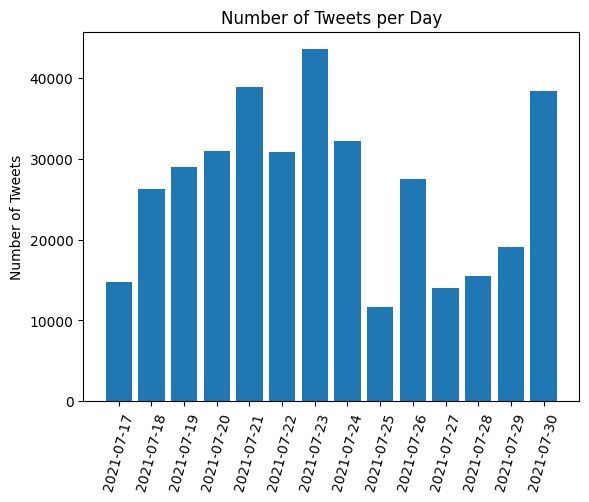

In [ ]:
#create copy to not overwrite datset -> will be used in task 2
dta_cont_plot=dta_cont.copy()

# Convert Date Column to DATE
dta_cont_plot['date'] = pd.to_datetime(dta_cont_plot["date"])

# Remove time stamp 
dta_cont_plot['date'] = pd.to_datetime(dta_cont_plot['date']).dt.date

# Sort Tweets by date 
dta_cont_sorted = dta_cont_plot.sort_values(by = ['date'], ascending= True)

# unique dates
dta_cont_counts = dta_cont_sorted.groupby(['date']).size().reset_index(name='counts')

# Make counts
plt.bar(dta_cont_counts['date'], dta_cont_counts['counts'])
plt.xticks(dta_cont_counts['date'])
plt.xticks(rotation = 75) 
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Day')
#plt.figure(figsize=(40,100))

plt.show()

#Models

## Labelled Long Term Dataset 

In [ ]:
dta_LT = pd.read_excel('/content/gdrive/My Drive/NLP Group Project (2022)/tweet_datasets/Kaggle_tweets_L_T_F_labelled.xlsx',index_col=0)

In [ ]:
# Create Data Frame with only Labelled Tweets 
dta_LT_labelled = dta_LT[~dta_LT['sentiment'].isnull()]

# Create Data Frame with only relevant columns: user_name, Date, Text, Sentiment Score 
dta_LT_labelled_Fin = dta_LT_labelled[['date','text','sentiment']]

# Rename Sentiment column
dta_LT_labelled_Fin['sentiment_hum_Label'] = dta_LT_labelled_Fin['sentiment']

# Drop old Sentiment column 
dta_LT_labelled_Fin = dta_LT_labelled_Fin.drop(['sentiment'], axis=1)

# Print Data Frame
dta_LT_labelled_Fin.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,text,sentiment_hum_Label
695796.0,2021-07-26 11:50:47,#btc to the moon 🚀🚀 08713,1.0
2088912.0,2022-01-12 13:27:03,"@AirdropDet Wonderful project, this project is...",1.0
2222501.0,2022-01-21 08:49:06,Full thanks to @Tradecrypto11 as they have ana...,1.0
1233887.0,2021-10-19 23:24:55,markets boring again. do something #bitcoin #b...,-1.0
992433.0,2021-08-15 19:42:21,Even the likelihood of a shitcoin like $ada fl...,0.0


### Exploration Tweet Sentiment according to Manual Labels 

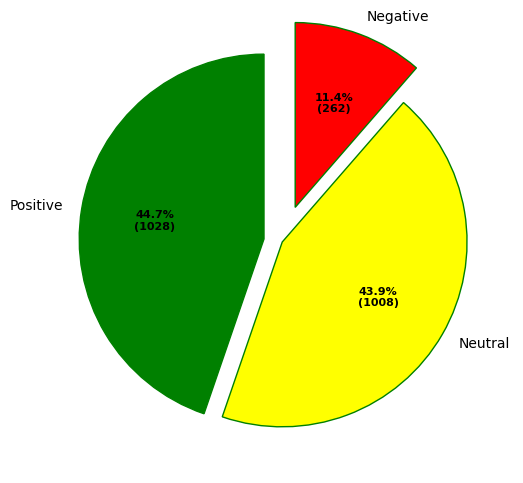

In [ ]:
### Pie Chart: Share of Pos., Neg., Neu. Tweets

# Finding Number of Pos., Neu., Neg. Tweets 

Num_Pos_T = 0 

Num_Neu_T = 0 

Num_Neg_T = 0 

for i in dta_LT_labelled_Fin['sentiment_hum_Label']: 

  if i == 1:

    Num_Pos_T += 1

  if i == 0:

    Num_Neu_T += 1

  if i == -1:

    Num_Neg_T += 1

Pos_Neu_Neg = [Num_Pos_T, Num_Neu_T, Num_Neg_T]

Sentiment = ["Positive", "Neutral", "Negative"]

# Creating explode data
explode = (0.1, 0.0, 0.2)
 
# Creating color parameters
colors = ( "Green", "Yellow", "Red")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(6, 6))
wedges, texts, autotexts = ax.pie(Pos_Neu_Neg,
                                  autopct = lambda pct: func(pct, Pos_Neu_Neg),
                                  explode = explode,
                                  labels = Sentiment,
                                  shadow = False,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="Black"))
 
plt.setp(autotexts, size = 8, weight ="bold")

# show Pie Chart 
plt.show()

##BERTweet

###Pre-processing 

*Normalizing the tweets using Bertweet built-in normalizing function and replacing important words by root words (stemming)*:




We first normalized the tweets using Bertweet procedure.

In [ ]:
# Normalizing Tweets used in pre-training
from transformers import AutoTokenizer

#%% Load the dataset and change it's format to be a txt file with each line having it's own sentence
from google.colab import drive
drive.mount("/content/gdrive")

dataset = pd.read_csv("/content/gdrive/My Drive/NLP Group Project (2022)/tweet_datasets/btc_tweet_20000_without_Sha_label - btc_tweet_20000.csv")
data_used_in_pretraining = dataset.iloc[1000:]
print("Our pre-training dataset is composed of:"+str(len(data_used_in_pretraining))+" tweets.")
tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base",use_fast=False)
tweets = data_used_in_pretraining["text"]

normalized_tweets = []
for tweet in range(len(tweets)):
    normalized_tweets.append(tokenizer.normalizeTweet(str(tweets.iloc[tweet])))
    if tweet%100 == 0:
        print("Did 100 more")
        print(tweet)

In [ ]:
tweets["normalized"] = normalized_tweets

Then, we looked for significant words and stemmed the occurences of those words to standard root.
To do so, we investigated which words were the important ones.

In [ ]:
#create two lists with words that appear to be significant
list_sig_words = ['pump', 'dump', 'short', 'long', 'squeeze', 'whale', 'project', 'price', 'moving average', 'MA',
                  'drop', 'fall', 'crash', 'bullish', 'bearish', 'bull', 'bulls', 'bear', 'stacking', 'stack',
                  'sats', 'satoshis', 'dca', 'dollar cost averaging', 'position', 'moon', 'hedge', 'bounce', 'support',
                  'resistance', 'etf', 'buy the dip', 'opportunity', 'crypto', 'alts', 'alt coins', 'alt season',
                  'top', 'bottom', 'profit', 'loss', 'marketcap', 'ath', 'all-time highs', 'win', 'signal', 'flashed',
                  'trend reverse', 'trending', 'hodl', 'benefit', 'bear market', 'bull market', 'technical', 'indicator',
                  'pull back', 'pull-back', 'panic', 'pattern', 'chart', 'sell', 'buy', 'peak', 'etf', 'mars', 'liquidity', 
                  'volume', 'stop-loss', 'manipulated', 'rich', 'boomer', 'buyer', 'seller', 'smart', 'contract']

list_new_sig = ['chain ', 'inflation', 'spot', 'future', 'boom', 'fed', 'nft', 'value', 'hold', 'volatile', 'rewards',
                'staking', 'trader', 'leverage', 'capitulate', 'capitulation', 'launch', 'rekt', 'scarcity', 'billionaire',
                'millionaire', 'fomo', 'winter', 'volume', '10x', '100x', '1000x', 'medium of exchange', 'keynesian', 'boomer', 
                'long-term', 'long term ', 'short term','short-term', 'fiat', 'stablecoin', 'stablecoins', 'liquid', 
                'fomos', 'scam', 'accumulate', 'accumulation']

In [ ]:
## build two functions to count the occurence of significant words in the tweets
# occurence_times_sig_word counts the total appearnce of a word in the tweets
def occurence_times_sig_word(list_words, df):
  """_summary_
  The function returns how often each word occured in each tweet and also
  how often the word occured in total

  Parameters
  ----------
  input : list, dataframe
    The function takes as input a list of words and a one column dataframe with
    tweets

  Returns
  -------
  output : tuple, tuple
  Returns two tuples: number of a word in each tweets and the total number of
  occurences
  """
  #change the tweets to lowercase
  df = df.str.lower()

  dict_occurence_times={}
  dict_occurence_times_sum={}

  #loop though the list of input words
  for word in list_words:
    #count the the occurence of a word in each tweet
    dict_occurence_times[word]=df.str.count(word)
    #count the the occurence of a word in total
    dict_occurence_times_sum[word]=df.str.count(word).sum()
  return(dict_occurence_times, dict_occurence_times_sum)

##build a function to return the ratio of the occurence of a word in the tweets to the toal number of tweets
def occurence_ratio_sig_word(list_words, df):
  """_summary_
  The function returns the ratio of tweets the word occured in.

  Parameters
  ----------
  input : list, dataframe
    The function takes as input a list of words and a one column dataframe with
    tweets

  Returns
  -------
  output : tuple
  Returns the ratio of tweets is word is represented in to the total amount of tweets
  """
  #run occurence_times_sig_word to get the occurence of a word in each tweet
  dict_occurence_times=occurence_times_sig_word(list_words, df)[0]
  dict_occurence_yes_no={}

  #check if a word occured in a tweet
  for key, tweet in dict_occurence_times.items():
    occurence=0
    for value in tweet:
      if value > 0:
        occurence+=1
      else:
        occurence+=0
    #calculate the ratio of tweets is word is represented in to the total amount of tweets
    dict_occurence_yes_no[key]=round(occurence/df.shape[0],3)
  #sort the dictionary descending
  dict_occurence_yes_no = sorted(dict_occurence_yes_no.items(),key=operator.itemgetter(1),reverse=True)
  return (dict_occurence_yes_no)

In [ ]:
#calculate the ratio for each word
occurence_ratio_sig_word(list_sig_words, dta['text'])

[('crypto', 0.268),
 ('price', 0.132),
 ('buy', 0.081),
 ('pump', 0.061),
 ('profit', 0.059),
 ('volume', 0.054),
 ('etf', 0.031),
 ('bull', 0.026),
 ('sell', 0.026),
 ('top', 0.025),
 ('win', 0.021),
 ('moon', 0.018),
 ('ath', 0.018),
 ('signal', 0.018),
 ('long', 0.013),
 ('chart', 0.013),
 ('alts', 0.012),
 ('hodl', 0.012),
 ('support', 0.011),
 ('short', 0.01),
 ('drop', 0.01),
 ('project', 0.009),
 ('bullish', 0.009),
 ('fall', 0.008),
 ('buyer', 0.007),
 ('smart', 0.007),
 ('dump', 0.006),
 ('bear', 0.006),
 ('resistance', 0.006),
 ('opportunity', 0.005),
 ('rich', 0.005),
 ('seller', 0.005),
 ('whale', 0.004),
 ('crash', 0.004),
 ('sats', 0.004),
 ('bearish', 0.003),
 ('bulls', 0.003),
 ('stack', 0.003),
 ('dca', 0.003),
 ('position', 0.003),
 ('bottom', 0.003),
 ('loss', 0.003),
 ('marketcap', 0.003),
 ('peak', 0.003),
 ('liquidity', 0.003),
 ('hedge', 0.002),
 ('bounce', 0.002),
 ('buy the dip', 0.002),
 ('trending', 0.002),
 ('bull market', 0.002),
 ('technical', 0.002),
 ('p

In [ ]:
#calculate the ratio for each word
occurence_ratio_sig_word(list_new_sig, dta['text'])

[('volume', 0.054),
 ('chain ', 0.034),
 ('hold', 0.016),
 ('future', 0.014),
 ('value', 0.012),
 ('trader', 0.007),
 ('nft', 0.005),
 ('launch', 0.005),
 ('fiat', 0.005),
 ('liquid', 0.005),
 ('boom', 0.003),
 ('scam', 0.003),
 ('accumulate', 0.003),
 ('inflation', 0.002),
 ('spot', 0.002),
 ('fed', 0.002),
 ('leverage', 0.002),
 ('millionaire', 0.002),
 ('fomo', 0.002),
 ('short term', 0.002),
 ('volatile', 0.001),
 ('rewards', 0.001),
 ('staking', 0.001),
 ('rekt', 0.001),
 ('billionaire', 0.001),
 ('10x', 0.001),
 ('100x', 0.001),
 ('1000x', 0.001),
 ('long term ', 0.001),
 ('short-term', 0.001),
 ('stablecoin', 0.001),
 ('accumulation', 0.001),
 ('capitulate', 0.0),
 ('capitulation', 0.0),
 ('scarcity', 0.0),
 ('winter', 0.0),
 ('medium of exchange', 0.0),
 ('keynesian', 0.0),
 ('boomer', 0.0),
 ('long-term', 0.0),
 ('stablecoins', 0.0),
 ('fomos', 0.0)]

From this investigation, we created a dictionary of important words and how they appeared in the tweets. We named that dictionary dict_tok_subs. This led to 50 important words that should be tokenized by our model.

In [ ]:
# Created a dictionary with all relevant words from the Bitcoin webpage and the words from the above analysis
# which occured in 0.5% of the tweets
dict_tok_subs = {'<bitcn>':['bitc','Bitc','BITC','Btc','btc','BTC'], '<coin>':['coin','Coin','COIN'], '<address>':['Address', 'address', 'ADDRESS'], '<block>':['Blockchain', 'blockchain', 'BLOCKCHAIN', 'Block Chain', 'block chain', 'BLOCK CHAIN'], '<confirmation>': ['Confirmation', 'confirmation', 'CONFIRMATION'], '<cryptography>':['Cryptography', 'cryptography', 'CRYPTOGRAPHY'], '<doublespend>': ['doublespend', 'Doublespend', 'DOUBLESPEND', 'double spend', 'Double Spend', 'DOUBLE SPEND'],
                    '<hashrate>': ['Hash Rate', 'HASH RATE', 'hash rate'], '<mining>': ['MINING', 'mining', 'Mining'], '<p2p>' : ['p2p', 'P2P', 'peer-to-peer', 'Peer-to-peer'], '<privatekey>': ['Private Key', 'private key', 'PRIVATE KEY','privatekey', 'PRIVATEKEY', 'Privatekey'],
                    '<signature>':['SIGNATURE', 'Signature', 'signature'] , '<wallet>':['Wallet', 'WALLET', 'wallet'],
                 '<price>': ['price', 'PRICE', 'Price'], '<buy>': ['buy', 'BUY', 'Buy'], '<pump>': ['pump', 'PUMP', 'Pump'],
                 '<profit>': ['PROFIT', 'profit', 'Profit'], '<volume>': ['volume', 'Volume', 'VOLUME'],
                 '<etf>': ['ETF', 'etf', 'Etf'], '<bull>': ['bull', 'Bull', 'BULL'], '<sell>': ['sell', 'SELL', 'Sell'],
                 '<top>': ['top', 'TOP', 'Top'], '<win>': ['win', 'WIN', 'Win'], '<moon>': ['moon', 'MOON', 'Moon'],
                 '<signal>': ['signal', 'SIGNAL', 'Signal'], '<long>': ['long', 'LONG', 'Long'], '<chart>': ['CHART', 'chart', 'Chart'],
                 '<alts>': ['alts', 'ALTS', 'Alts'], '<hodl>': ['hodl', 'HODL', 'Hodl'], '<support>': ['support', 'SUPPORT', 'Support'],
                 '<short>': ['short', 'Short', 'SHORT'], '<drop>': ['drop', 'DROP', 'Drop'], '<project>': ['project', 'PROJECT', 'Project'],
                 '<bullish>': ['bulllish', 'Bullish', 'BULLISH'], '<fall>': ['fall', 'Fall', 'FALL'], '<dump>': ['dump', 'DUMP', 'Dump'],
                 '<bear>': ['bear', 'Bear', 'BEAR'], '<resistance>': ['resistance', 'RESISTANCE', 'Resistance'], '<opportunity>': ['opportunity', 'OPPORTUNITY', 'Opportunity'],
                 '<stop-loss>': ['stop-loss', 'stop loss', 'STOP-LOSS'], '<volume>': ['Volume', 'VOLUME', 'volume'],
                 '<chain>': ['chain', 'Chain', 'CHAIN'], '<hold>': ['hold', 'Hold', 'HOLD'], '<future>': ['future', 'FUTURE', 'Future'],
                 '<value>': ['value', 'Value', 'VALUE'], '<trader>': ['trader', 'Trader', 'TRADER'], '<nft>': ['nft', 'NFT', 'Nft'],
                 '<launch>': ['launch', 'Launch', 'LAUNCH'], '<fiat>': ['fiat', 'Fiat', 'FIAT'], '<liquid>': ['liquid', 'Liquid', 'LIQUID'],
                 '<scam>': ['scam', 'Scam', 'SCAM']}

In [ ]:
#get the number of tokens
len(dict_tok_subs)

50

The following function replaces the words appearing in a tweet and present in our dictionary by a root "token" which was added to the model tokenizer.

In [ ]:
def replace_by_token(lst_of_tweets, tokens_dictionary):
  """_summary_
    In this function, words that are significant for bitcoin tweets are replaced
    by appropriate tokens.

    Parameters
    ----------
    input : list, dict
      The function takes as input a dataframe with 1 column of tweets
      and a dictionary with signifcant substrings of words which are assigned 
      to an appropriate token.
      The order in which the keys in the the dictionary are placed matters,
      as words that could be assigned to two different tokens will be replaced by 
      the token that shows up first in the dictionary.

    Returns
    -------
    output : list
      It returns a list of tweets in which the  significant words 
      of each tweet are replaced by tokens.
  """
  list_tweets = []
  #loop thourgh every tweet
  for text in lst_of_tweets:
    splits = text.split(" ")

    for split in range(len(splits)):
        #go to every toke
        for key in tokens_dictionary:
            #loop through substrings that are associated with each token
            for possible_string in tokens_dictionary[key]:
                if possible_string in splits[split]:
                    splits[split]=key

    text_tok = ' '.join(splits)
    list_tweets.append(text_tok)

  return list_tweets

We then loaded Bertweet tokenizer adding that list of new tokens.

In [ ]:
# Get the list of tokens that should be added
list_tokens = list(dict_tok_subs.keys())

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base",additional_special_tokens =list_tokens)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


We then could simply replace each substring by their root in the normalized tweets.

In [ ]:
# Replace data normalized by specific tokens 
tweets_tokenized = replace_by_token(tweets["normalized"],dict_tok_subs)
tweets_tokenized_df = pd.DataFrame(tweets_tokenized)

We saved the pre-processed dataset to be able to reuse it faster when pre-training.

In [ ]:
#Save the dataset so we don't have to redo those steps in the future if we want to pretrain differently
tweets_tokenized_df.to_csv("/content/gdrive/My Drive/NLP Group Project (2022)/pre-training_and_fine-tuning_bertweet/tweets_normalized_df.txt", index = False,header = False)

###Pre-training

Check Pre-training-Bertweet.ipynb to see how pre-training was implemented

**Ressources used for pre-training:**


1.   https://towardsdatascience.com/transformers-retraining-roberta-base-using-the-roberta-mlm-procedure-7422160d5764
2.   https://discuss.huggingface.co/t/adding-new-tokens-while-preserving-tokenization-of-adjacent-tokens/12604
3.   https://github.com/EmilyAlsentzer/clinicalBERT/tree/master/lm_pretraining



###Fine-tuning

Check pre-training_fine-tuning/berttweet_fine_tuning.ipynb for BerTweet Fine Tuning code


##RoBERTa

Check fine-tuning_roberta/roberta_fine_tuning.ipynb for Roberta Fine Tuning code

---



**Resources used:** 
- https://huggingface.co/cardiffnlp/twitter-roberta-base
- https://github.com/Data-Science-kosta/Twitter-Sentiment-Analysis-RoBERTa/blob/main/dataset_utils.py



## VADER (GP Sentiment Model)

### Model Implementation (Generating Sentiment Scores)

In [ ]:
VADER = SentimentIntensityAnalyzer()

#Build function to perform sentiment prediction with VADER
def VADER_Sent_Analysis(Tweet_data):

  Tweet_data['scores'] = Tweet_data['text'].apply(lambda text: VADER.polarity_scores(text))

  Tweet_data['compound']  = Tweet_data['scores'].apply(lambda score_dict: score_dict['compound'])
  
  #classify compound score to -1, 0, 1
  Tweet_data['comp_score'] = Tweet_data['compound'].apply(lambda c: 1 if c >=0.05 else(0 if c < 0.05 and c > -0.05 else -1 ))

  return Tweet_data


**Resources**
- https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664
- https://github.com/cjhutto/vaderSentiment#about-the-scoring

# Task 1: Sentiment Analysis vs. Manually Labelled Tweets

##Labelled Short Term Dataset


In [ ]:
import pandas as pd

In [ ]:
dta_Short_labelled = pd.read_csv('/content/gdrive/My Drive/NLP Group Project (2022)/task1/task1_labelled.csv',index_col=0)

In [ ]:
dta_Short_labelled.head()

,text,sentiment
0,PayPal CEO: 50% of crypto holders open the app...,1.0
1,🎙️Tune in to the Blockchat's exclusive intervi...,0.0
2,1 BTC Price: Bitstamp 38581.15 USD Coinbase U...,0.0
3,"take it now, don't regret it tomorrow, goal is...",1.0
4,More than 200% Profits and 115M$ Volume in $SK...,1.0


In [ ]:
# Create Data Frame with only Labelled Tweets 
dta_ST_labelled = dta_Short_labelled[~dta_Short_labelled['sentiment'].isnull()]

# Create Data Frame with only relevant columns: user_name, Date, Text, Sentiment Score 
dta_ST_labelled_Fin = dta_ST_labelled.copy()

# Rename Sentiment column
dta_ST_labelled_Fin['sentiment_hum_Label'] = dta_ST_labelled_Fin['sentiment']

# Drop old Sentiment column 
dta_ST_labelled_Fin = dta_ST_labelled_Fin.drop(['sentiment'], axis=1)

# Print Data Frame 
dta_ST_labelled_Fin.head()

,text,sentiment_hum_Label
0,PayPal CEO: 50% of crypto holders open the app...,1.0
1,🎙️Tune in to the Blockchat's exclusive intervi...,0.0
2,1 BTC Price: Bitstamp 38581.15 USD Coinbase U...,0.0
3,"take it now, don't regret it tomorrow, goal is...",1.0
4,More than 200% Profits and 115M$ Volume in $SK...,1.0


In [ ]:
#get number of labelled tweets in the final dataset
len(dta_ST_labelled_Fin)

946

### Exploration Tweet Sentiment according to Manual Labels

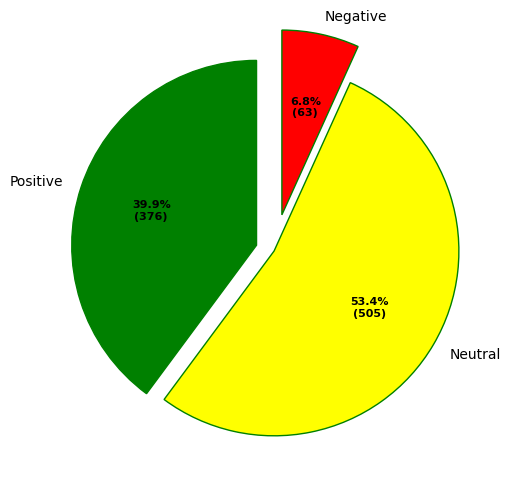

In [ ]:
### Pie Chart: Share of Pos., Neg., Neu. Tweets

# Finding Number of Pos., Neu., Neg. Tweets 

Num_Pos_T = 0 

Num_Neu_T = 0 

Num_Neg_T = 0 

for i in dta_ST_labelled_Fin['sentiment_hum_Label']: 

  if i == 1:

    Num_Pos_T += 1

  if i == 0:

    Num_Neu_T += 1

  if i == -1:

    Num_Neg_T += 1

Pos_Neu_Neg = [Num_Pos_T, Num_Neu_T, Num_Neg_T]

Sentiment = ["Positive", "Neutral", "Negative"]

# Creating explode data
explode = (0.1, 0.0, 0.2)
 
# Creating color parameters
colors = ( "Green", "Yellow", "Red")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(6, 6))
wedges, texts, autotexts = ax.pie(Pos_Neu_Neg,
                                  autopct = lambda pct: func(pct, Pos_Neu_Neg),
                                  explode = explode,
                                  labels = Sentiment,
                                  shadow = False,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="Black"))
 
plt.setp(autotexts, size = 8, weight ="bold")

# show Pie Chart 
plt.show()

Resource Used:
- https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/

##BERTweet

Check task1/bertweet_task1.ipynb for prediction code

##RoBERTa

Check task1/roberta_task1.ipynb for prediction code

##VADER

###Generating Sentiment Scores

In [ ]:
dta_for_V_S = pd.read_csv('/content/gdrive/My Drive/NLP Group Project (2022)/task1/task1_labelled.csv')

In [ ]:
#run short term dataframe through VADER
dta_V_S = VADER_Sent_Analysis(dta_for_V_S)

In [ ]:
dta_for_V_S.head()

,Unnamed: 0,text,sentiment,scores,compound,comp_score
0,0,PayPal CEO: 50% of crypto holders open the app...,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0
1,1,🎙️Tune in to the Blockchat's exclusive intervi...,0.0,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.2003,1
2,2,1 BTC Price: Bitstamp 38581.15 USD Coinbase U...,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0
3,3,"take it now, don't regret it tomorrow, goal is...",1.0,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...",0.3252,1
4,4,More than 200% Profits and 115M$ Volume in $SK...,1.0,"{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'comp...",0.7614,1


In [ ]:
Ground_Truth_l = dta_for_V_S['sentiment']
Vader_l = dta_for_V_S['comp_score']

###Results

####Confusion Matrix to evaluate Vader Sentiment Analysis


Text(0.5, 0.98, 'VADER Confusion Matrix')

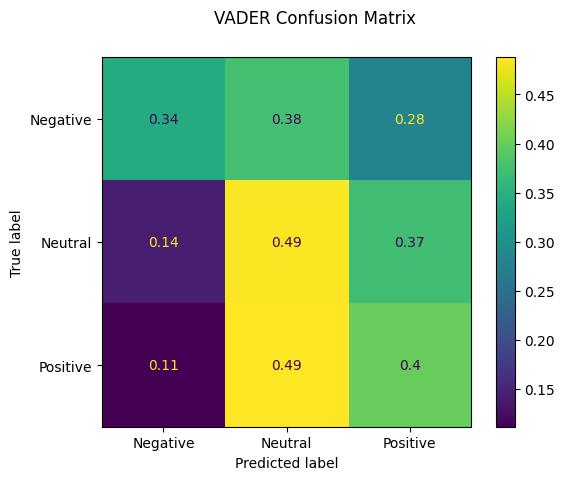

In [ ]:
#plot confusion matrix for VADER
cm_VADER = confusion_matrix(Ground_Truth_l, Vader_l, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_VADER,display_labels=["Negative","Neutral","Positive"])
disp.plot()
plt.suptitle("VADER Confusion Matrix")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['re', 'disp']
`%matplotlib` prevents importing * from pylab and numpy



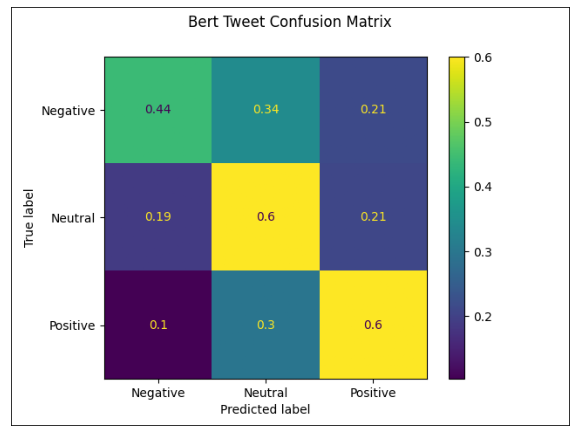

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/NLP Group Project (2022)/task1/bertweet_confusion_matrix.png')
plt.figure(figsize=(10,10))
imgplot = plt.imshow(img)
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)
plt.show()

Populating the interactive namespace from numpy and matplotlib


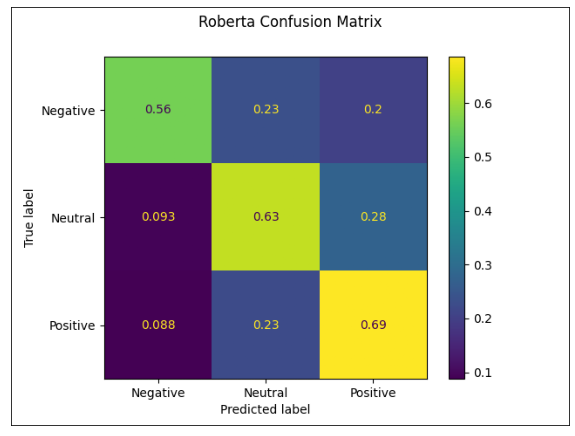

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/NLP Group Project (2022)/task1/roberta_confusion_matrix.png')
plt.figure(figsize=(10,10))
imgplot = plt.imshow(img)
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)
plt.show()

#### Accuracy and F1-score 

In [ ]:
f1_vader = f1_score(Ground_Truth_l, Vader_l,average=None)
f1_vader

array([0.22      , 0.51148225, 0.41144414])

In [ ]:
accuracy_vader = accuracy_score(Ground_Truth_l, Vader_l)
accuracy_vader

0.4418604651162791

**Resource used**:
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- https://github.com/prrao87/fine-grained-sentiment/blob/master/plotter.py

## Comparison of Model Performance

|Model     | F1 | Accuracy     |
| :---        |    :----:   |          ---: |
| Vader      | [0.220, 0.511,0.411]       | 0.442   |
| Roberta   | [0.400, 0.690, 0.657]        | 0.649      |
|Bert-Tweet|[0.309, 0.724, 0.677]|0.658

#Task 2: Correlation between Model assigned Sentiment and Price 

Check task2 directory for Bert-Tweet & Roberta Prediction Codes

The financial data appearing in the "price" folder was taken from Binance API and Bistamp.

##Exploratory Analysis Price/Volume Data



###Read daily bitcoin return and volatility into table

In [ ]:
#load bitcoin price dataset on a daily basis
bitcoin_return_daily_initial = pd.read_csv('/content/gdrive/My Drive/NLP Group Project (2022)/price/Bitstamp_BTCUSD_d.csv', 
                               header = [1])
#calculate return
bitcoin_return_daily_initial['return'] = (bitcoin_return_daily_initial['close']-bitcoin_return_daily_initial['open'])/bitcoin_return_daily_initial['open']

bitcoin_return_daily_initial.sort_values(by = ['date'], ascending= True)
#calculate volatility
bitcoin_return_daily_initial['volatility'] = bitcoin_return_daily_initial['return'].rolling(20).std()

bitcoin_return_daily_initial['date'] = pd.to_datetime(bitcoin_return_daily_initial['date'])
bitcoin_return_daily_initial.head()


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,return,volatility
0,1648252800,2022-03-26,BTC/USD,44340.49,44486.78,44101.00,44236.40,33.347330,1.475166e+06,-0.002348,NaN
1,1648166400,2022-03-25,BTC/USD,44025.99,45137.12,43616.88,44320.60,1725.071570,7.645621e+07,0.006692,NaN
2,1648080000,2022-03-24,BTC/USD,42912.21,44240.00,42636.54,44025.99,2173.304975,9.568190e+07,0.025955,NaN
3,1647993600,2022-03-23,BTC/USD,42393.62,43021.73,41779.11,42925.41,1906.723546,8.184689e+07,0.012544,NaN
4,1647907200,2022-03-22,BTC/USD,41018.36,43337.41,40901.13,42393.41,2375.424654,1.007024e+08,0.033523,NaN


In [ ]:
#add column with one day return lag
bitcoin_return_daily = pd.DataFrame(data=bitcoin_return_daily_initial, columns=['date', 'return','close','open','high','low'])

bitcoin_return_daily = bitcoin_return_daily.set_index(pd.DatetimeIndex(bitcoin_return_daily['date']))

bitcoin_return_daily['return_1_day_later'] = bitcoin_return_daily['return'].shift(periods=1)

bitcoin_return_daily['volatility'] = bitcoin_return_daily['return'].rolling(3).std()

bitcoin_return_daily['volatility_1_day_later'] = bitcoin_return_daily['volatility'].shift(periods=1)

bitcoin_return_daily = pd.DataFrame(data=bitcoin_return_daily, columns=['date', 'return', 'volatility', 'return_1_day_later', 'volatility_1_day_later','close','open','high','low'])

bitcoin_return_daily = bitcoin_return_daily.set_index(pd.DatetimeIndex(bitcoin_return_daily['date']))
bitcoin_return_daily.head()

,date,return,volatility,return_1_day_later,volatility_1_day_later,close,open,high,low
date,,,,,,,,,
2022-03-26,2022-03-26,-0.002348,NaN,NaN,NaN,44236.40,44340.49,44486.78,44101.00
2022-03-25,2022-03-25,0.006692,NaN,-0.002348,NaN,44320.60,44025.99,45137.12,43616.88
2022-03-24,2022-03-24,0.025955,0.014456,0.006692,NaN,44025.99,42912.21,44240.00,42636.54
2022-03-23,2022-03-23,0.012544,0.009876,0.025955,0.014456,42925.41,42393.62,43021.73,41779.11
2022-03-22,2022-03-22,0.033523,0.010624,0.012544,0.009876,42393.41,41018.36,43337.41,40901.13


### Daily Closing Price (17th July 2021 - 30th July 2021)

In [ ]:
import plotly.graph_objects as go
from datetime import datetime

In [ ]:
jul_frame = bitcoin_return_daily.loc[(bitcoin_return_daily.index >= datetime(2021,7,17)) & (bitcoin_return_daily.index <=datetime(2021,7,30))]
fig = go.Figure(data=[go.Candlestick(x=jul_frame.index,
                open=jul_frame.open,
                high=jul_frame.high,
                low=jul_frame.low,
                close=jul_frame.close)])
fig.update_yaxes(title_text = "USD")
fig.update_layout(title="BTC Candles July 17th - 31th")
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

##Read hourly bitcoin return and volatility into table

In [ ]:
bitcoin_return_hourly = pd.read_csv('/content/gdrive/My Drive/NLP Group Project (2022)/price/BTCUSDT_SPOT_1h.csv')

bitcoin_return_hourly['return'] = (bitcoin_return_hourly['close']-bitcoin_return_hourly['open'])/bitcoin_return_hourly['open']

bitcoin_return_hourly.sort_values(by = ['datetime'], ascending= True)
#calculate volatility
bitcoin_return_hourly['volatility'] = bitcoin_return_hourly['return'].rolling(20).std()

bitcoin_return_hourly['datetime'] = pd.to_datetime(bitcoin_return_hourly['datetime'])

bitcoin_return_hourly = pd.DataFrame(data=bitcoin_return_hourly, columns=['datetime', 'return', 'volatility','close'])

bitcoin_return_hourly = bitcoin_return_hourly.set_index(pd.DatetimeIndex(bitcoin_return_hourly['datetime']))

In [ ]:
bitcoin_return_hourly.tail()

,datetime,return,volatility,close
datetime,,,,
2022-01-29 13:00:00,2022-01-29 13:00:00,0.008300,0.004659,38161.69
2022-01-29 14:00:00,2022-01-29 14:00:00,-0.014194,0.005771,37620.04
2022-01-29 15:00:00,2022-01-29 15:00:00,-0.001415,0.005716,37566.82
2022-01-29 16:00:00,2022-01-29 16:00:00,-0.000793,0.004688,37538.19
2022-01-29 17:00:00,2022-01-29 17:00:00,0.002125,0.004713,37617.94


##BERTweet


###Generating Sentiment Scores

In [ ]:
#read bertweet predicitions into dataframe 
dta_bertweet_cont_pred_17_21 = pd.read_csv('/content/gdrive/My Drive/NLP Group Project (2022)/task2/task2_predictions/cont_berttweet_pred_17_21.csv')
dta_bertweet_cont_pred_21_29 = pd.read_csv('/content/gdrive/My Drive/NLP Group Project (2022)/task2/task2_predictions/cont_berttweet_pred_21_29.csv')
dta_bertweet_cont_pred_29_30 = pd.read_csv('/content/gdrive/My Drive/NLP Group Project (2022)/task2/task2_predictions/cont_berttweet_pred_29_30.csv')
dta_bertweet_cont_pred_17_30 = pd.concat([dta_bertweet_cont_pred_17_21, dta_bertweet_cont_pred_21_29, dta_bertweet_cont_pred_29_30], ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
dta_bertweet_cont_pred_17_30.tail()

,Unnamed: 0,date,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,is_retweet,clean_tweet,bertweet_tweet,bertweet_pred
372181,246230,2021-07-30 23:59:56,Nitin Dass ∞/21M,United Kingdom,Bitcoiner | Trader | Truth seeker | Freedom ...,2020-10-25 12:23:58,265.0,415.0,15391.0,False,@HodlingCarla Wooohoooo 200k in sight #bitcoin...,['bitcoin'],Twitter for iPhone,False,@USER Wooohoooo 200k in sight #bitcoin HTTPURL,@USER Wooohoooo 200k in sight <bitcn> HTTPURL,1
372182,246229,2021-07-30 23:59:56,The Last Sat,Satlandia,Counting down to the last sat ever.\n#bitcoin,2020-09-14 04:00:03,3.0,18.0,11.0,False,"Before you know it we'll be under 90,000,000,0...","['Bitcoin', 'stayhumblestacksats']",Twitter for Android,False,"Before you know it we 'll be under 90,000 , 00...","Before you know it we 'll be under 90,000 , 00...",1
372183,273447,2021-07-30 23:59:57,Air アーロン,Kings Canyon,"(E)sports psychology.\nWin the mind, win the g...",2021-02-15 21:42:55,64.0,451.0,920.0,False,#btc just hit Jackie Robinson,['btc'],Twitter for Android,False,#btc just hit Jackie Robinson,<bitcn> just hit Jackie Robinson,1
372184,273446,2021-07-30 23:59:58,Greg Pearson,NaN,"mathematics, science, running, crypto, beer.",2021-05-31 21:50:18,8.0,12.0,3.0,False,"@BTC_Archive Yes, if the weekly close tomorrow...",['BTC'],Twitter Web App,False,"@USER Yes , if the weekly close tomorrow is at...","@USER Yes , if the weekly close tomorrow is at...",-1
372185,246228,2021-07-30 23:59:59,Tay Sol,NaN,Expressing my vision through art,2016-08-29 09:07:46,665.0,184.0,2234.0,False,Clear manipulation by whales in the market to ...,"['cryptocurrency', 'bitcoin', 'safemoon']",Twitter for iPhone,False,Clear manipulation by whales in the market to ...,Clear manipulation by whales in the market to ...,-1


In [ ]:
#change date type to datetime
dta_bertweet_cont_pred_17_30['date'] = pd.to_datetime(dta_bertweet_cont_pred_17_30["date"])
#extract only date and sentiment score
dta_bertweet_cont_pred_17_30_corr = pd.DataFrame(data=dta_bertweet_cont_pred_17_30, columns=['date', 'bertweet_pred'])
#change index to date
dta_bertweet_cont_pred_17_30_corr = dta_bertweet_cont_pred_17_30_corr.set_index(pd.DatetimeIndex(dta_bertweet_cont_pred_17_30_corr['date']))
#remove all words with NaN
dta_bertweet_cont_pred_17_30_corr = dta_bertweet_cont_pred_17_30_corr[dta_bertweet_cont_pred_17_30_corr['date'].notna()]

In [ ]:
#build an hourly sentiment average
dta_bertweet_cont_pred_17_30_corr_hourly = dta_bertweet_cont_pred_17_30_corr.resample('H').mean()
dta_bertweet_cont_pred_17_30_corr_hourly=dta_bertweet_cont_pred_17_30_corr_hourly[dta_bertweet_cont_pred_17_30_corr_hourly['bertweet_pred'].notna()]

#build an daily average
dta_bertweet_cont_pred_17_30_corr_daily = dta_bertweet_cont_pred_17_30_corr.resample('D').mean()
dta_bertweet_cont_pred_17_30_corr_daily=dta_bertweet_cont_pred_17_30_corr_daily[dta_bertweet_cont_pred_17_30_corr_daily['bertweet_pred'].notna()]

In [ ]:
dta_bertweet_cont_pred_17_30_corr_hourly.head()

,bertweet_pred
date,
2021-07-17 09:00:00,0.095687
2021-07-17 10:00:00,0.037076
2021-07-17 11:00:00,0.035187
2021-07-17 12:00:00,0.028125
2021-07-17 13:00:00,0.079887


In [ ]:
dta_bertweet_cont_pred_17_30_corr_daily.head()

,bertweet_pred
date,
2021-07-17,0.054842
2021-07-18,0.019399
2021-07-19,0.025613
2021-07-20,0.012220
2021-07-21,0.115223


###Granger Causality Test on Hourly Lags

In [ ]:
#merge datasets
dta_bertweet_cont_pred_17_30_hourly_merge = pd.merge(dta_bertweet_cont_pred_17_30_corr_hourly, bitcoin_return_hourly, how='inner', left_index=True, right_index=True)
#remove NaN rows
dta_bertweet_cont_pred_17_30_hourly_merge = dta_bertweet_cont_pred_17_30_hourly_merge[dta_bertweet_cont_pred_17_30_hourly_merge['bertweet_pred'].notna()]

In [ ]:
dta_bertweet_cont_pred_17_30_hourly_merge.head()

,bertweet_pred,datetime,return,volatility,close
2021-07-17 09:00:00,0.095687,2021-07-17 09:00:00,0.006118,0.004421,31706.44
2021-07-17 10:00:00,0.037076,2021-07-17 10:00:00,-0.003056,0.004454,31609.54
2021-07-17 11:00:00,0.035187,2021-07-17 11:00:00,-0.010298,0.004916,31280.00
2021-07-17 12:00:00,0.028125,2021-07-17 12:00:00,0.003559,0.004543,31391.33
2021-07-17 13:00:00,0.079887,2021-07-17 13:00:00,0.003506,0.004654,31501.41


Granger Causality Function Example

grangercausalitytests(response_variable, lagged_variable,maximum_lags)

In [ ]:
#perform granger causality test
grangercausalitytests(dta_bertweet_cont_pred_17_30_hourly_merge[['return', 'bertweet_pred']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.5428 , p=0.0005  , df_denom=323, df_num=1
ssr based chi2 test:   chi2=12.6593 , p=0.0004  , df=1
likelihood ratio test: chi2=12.4197 , p=0.0004  , df=1
parameter F test:         F=12.5428 , p=0.0005  , df_denom=323, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.2007  , p=0.0023  , df_denom=320, df_num=2
ssr based chi2 test:   chi2=12.5953 , p=0.0018  , df=2
likelihood ratio test: chi2=12.3573 , p=0.0021  , df=2
parameter F test:         F=6.2007  , p=0.0023  , df_denom=320, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.5165  , p=0.0041  , df_denom=317, df_num=3
ssr based chi2 test:   chi2=13.8488 , p=0.0031  , df=3
likelihood ratio test: chi2=13.5610 , p=0.0036  , df=3
parameter F test:         F=4.5165  , p=0.0041  , df_denom=317, df_num=3


{1: ({'lrtest': (12.419682820341677, 0.00042483238755662507, 1),
   'params_ftest': (12.542796887163444, 0.0004562666230805582, 323.0, 1.0),
   'ssr_chi2test': (12.659293452678869, 0.0003737034146020585, 1),
   'ssr_ftest': (12.54279688716342, 0.0004562666230805582, 323.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (12.357327518501279, 0.002073196293947018, 2),
   'params_ftest': (6.200744415331294, 0.002279937169292475, 320.0, 2.0),
   'ssr_chi2test': (12.595262093641706, 0.0018406600537548606, 2),
   'ssr_ftest': (6.200744415331302, 0.0022799371692924304, 320.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (13.560957515832342, 0.0035679740117481504, 3),
   'params_ftest': (4.516517615748421, 0.004051914637467115, 317.0, 3.0),
   'ssr_chi2test': (13.848754329676439, 0.00311842235076033, 3),
   'ssr_ftest': (4.516517615748386, 0.004051914637467361, 317.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.

In [ ]:
#perform granger causality test
grangercausalitytests(dta_bertweet_cont_pred_17_30_hourly_merge[['volatility', 'bertweet_pred']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=17.9254 , p=0.0000  , df_denom=323, df_num=1
ssr based chi2 test:   chi2=18.0919 , p=0.0000  , df=1
likelihood ratio test: chi2=17.6077 , p=0.0000  , df=1
parameter F test:         F=17.9254 , p=0.0000  , df_denom=323, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.2174  , p=0.0009  , df_denom=320, df_num=2
ssr based chi2 test:   chi2=14.6604 , p=0.0007  , df=2
likelihood ratio test: chi2=14.3393 , p=0.0008  , df=2
parameter F test:         F=7.2174  , p=0.0009  , df_denom=320, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.7700  , p=0.0029  , df_denom=317, df_num=3
ssr based chi2 test:   chi2=14.6259 , p=0.0022  , df=3
likelihood ratio test: chi2=14.3054 , p=0.0025  , df=3
parameter F test:         F=4.7700  , p=0.0029  , df_denom=317, df_num=3


{1: ({'lrtest': (17.60774054614194, 2.7148109605932405e-05, 1),
   'params_ftest': (17.925438275282644, 2.9983881159572416e-05, 323.0, 1.0),
   'ssr_chi2test': (18.091928414062178, 2.1049184049401223e-05, 1),
   'ssr_ftest': (17.925438275282463, 2.99838811595754e-05, 323.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (14.339333702028853, 0.0007695790730122197, 2),
   'params_ftest': (7.217413341885316, 0.0008593242064502332, 320.0, 2.0),
   'ssr_chi2test': (14.660370850700955, 0.0006554520384329919, 2),
   'ssr_ftest': (7.217413341883546, 0.0008593242064516727, 320.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (14.305369471731865, 0.0025176286647510247, 3),
   'params_ftest': (4.769961989535726, 0.002880390924861183, 317.0, 3.0),
   'ssr_chi2test': (14.625877141413461, 0.0021659507908612053, 3),
   'ssr_ftest': (4.769961989535048, 0.0028803909248638513, 317.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 

### Correlation between sentiment and next day return as well as volatility

In [ ]:
#merge datasets
dta_bertweet_cont_pred_17_30_corr_daily_merge = pd.merge(dta_bertweet_cont_pred_17_30_corr_daily,bitcoin_return_daily, how='inner', left_index=True, right_index=True)
dta_bertweet_cont_pred_17_30_corr_daily_merge = dta_bertweet_cont_pred_17_30_corr_daily_merge[dta_bertweet_cont_pred_17_30_corr_daily_merge['bertweet_pred'].notna()]

In [ ]:
dta_bertweet_cont_pred_17_30_corr_daily_merge.head()

,bertweet_pred,date,return,volatility,return_1_day_later,volatility_1_day_later,close,open,high,low
date,,,,,,,,,,
2021-07-17,0.054842,2021-07-17,0.004888,0.021463,0.008484,0.023416,31529.68,31376.30,31950.00,31176.66
2021-07-18,0.019399,2021-07-18,0.008484,0.023416,-0.030357,0.063934,31776.65,31509.33,32440.98,31100.00
2021-07-19,0.025613,2021-07-19,-0.030357,0.063934,-0.033596,0.056992,30829.29,31794.49,31881.71,30400.00
2021-07-20,0.012220,2021-07-20,-0.033596,0.056992,0.078725,0.036482,29786.58,30822.08,31068.62,29296.39
2021-07-21,0.115223,2021-07-21,0.078725,0.036482,0.005762,0.018744,32138.45,29792.99,32875.42,29500.00


In [ ]:
#get pearson correlation coefficient between sentiment and next day return
correlation_pear_return, p_value_pear_return=stats.pearsonr(dta_bertweet_cont_pred_17_30_corr_daily_merge['bertweet_pred'].tolist(), dta_bertweet_cont_pred_17_30_corr_daily_merge['return_1_day_later'].tolist())

In [ ]:
correlation_pear_return

0.3258743552996626

In [ ]:
p_value_pear_return

0.255531740674934

In [ ]:
#get pearson correlation coefficient between sentiment and next day volatility
correlation_pear_vola, p_value_pear_vola=stats.pearsonr(dta_bertweet_cont_pred_17_30_corr_daily_merge['bertweet_pred'].tolist(), dta_bertweet_cont_pred_17_30_corr_daily_merge['volatility_1_day_later'].tolist())

In [ ]:
correlation_pear_vola

-0.34488670984301667

In [ ]:
p_value_pear_vola

0.2271903806277716

##RoBERTa

###Generating Sentiment Scores 

In [ ]:
#read roberta predicitions into dataframe 
dta_roberta_cont_pred_17_21 = pd.read_csv('/content/gdrive/My Drive/NLP Group Project (2022)/task2/task2_predictions/cont_roberta_pred_17_21.csv')
dta_roberta_cont_pred_21_29 = pd.read_csv('/content/gdrive/My Drive/NLP Group Project (2022)/task2/task2_predictions/cont_roberta_pred_21_29.csv')
dta_roberta_cont_pred_29_30 = pd.read_csv('/content/gdrive/My Drive/NLP Group Project (2022)/task2/task2_predictions/cont_roberta_pred_29_31.csv')
dta_roberta_cont_pred_17_30 = pd.concat([dta_roberta_cont_pred_17_21, dta_roberta_cont_pred_21_29, dta_roberta_cont_pred_29_30], ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
dta_roberta_cont_pred_17_30.tail()

,Unnamed: 0,date,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,is_retweet,clean_tweet,roberta_pred
372181,246229,2021-07-30 23:59:56,The Last Sat,Satlandia,Counting down to the last sat ever.\n#bitcoin,2020-09-14 04:00:03,3.0,18.0,11.0,False,"Before you know it we'll be under 90,000,000,0...","['Bitcoin', 'stayhumblestacksats']",Twitter for Android,False,"before you know it we'll be under 90,000,000,0...",1
372182,246230,2021-07-30 23:59:56,Nitin Dass ∞/21M,United Kingdom,Bitcoiner | Trader | Truth seeker | Freedom ...,2020-10-25 12:23:58,265.0,415.0,15391.0,False,@HodlingCarla Wooohoooo 200k in sight #bitcoin...,['bitcoin'],Twitter for iPhone,False,@user wooohoooo 200k in sight bitcoin,1
372183,273447,2021-07-30 23:59:57,Air アーロン,Kings Canyon,"(E)sports psychology.\nWin the mind, win the g...",2021-02-15 21:42:55,64.0,451.0,920.0,False,#btc just hit Jackie Robinson,['btc'],Twitter for Android,False,btc just hit jackie robinson,1
372184,273446,2021-07-30 23:59:58,Greg Pearson,NaN,"mathematics, science, running, crypto, beer.",2021-05-31 21:50:18,8.0,12.0,3.0,False,"@BTC_Archive Yes, if the weekly close tomorrow...",['BTC'],Twitter Web App,False,"@user archive yes, if the weekly close tomorro...",1
372185,246228,2021-07-30 23:59:59,Tay Sol,NaN,Expressing my vision through art,2016-08-29 09:07:46,665.0,184.0,2234.0,False,Clear manipulation by whales in the market to ...,"['cryptocurrency', 'bitcoin', 'safemoon']",Twitter for iPhone,False,clear manipulation by whales in the market to ...,-1


In [ ]:
#change date type to datetime
dta_roberta_cont_pred_17_30['date'] = pd.to_datetime(dta_roberta_cont_pred_17_30["date"])
#extract only date and sentiment score
dta_roberta_cont_pred_17_30_corr = pd.DataFrame(data=dta_roberta_cont_pred_17_30, columns=['date', 'roberta_pred'])
#change index to date
dta_roberta_cont_pred_17_30_corr = dta_roberta_cont_pred_17_30_corr.set_index(pd.DatetimeIndex(dta_roberta_cont_pred_17_30_corr['date']))
#remove all words with NaN
dta_roberta_cont_pred_17_30_corr = dta_roberta_cont_pred_17_30_corr[dta_roberta_cont_pred_17_30_corr['date'].notna()]

In [ ]:
#build an hourly sentiment average
dta_roberta_cont_pred_17_30_corr_hourly = dta_roberta_cont_pred_17_30_corr.resample('H').mean()
dta_roberta_cont_pred_17_30_corr_hourly=dta_roberta_cont_pred_17_30_corr_hourly[dta_roberta_cont_pred_17_30_corr_hourly['roberta_pred'].notna()]

#build an daily average
dta_roberta_cont_pred_17_30_corr_daily = dta_roberta_cont_pred_17_30_corr.resample('D').mean()
dta_roberta_cont_pred_17_30_corr_daily=dta_roberta_cont_pred_17_30_corr_daily[dta_roberta_cont_pred_17_30_corr_daily['roberta_pred'].notna()]

In [ ]:
dta_roberta_cont_pred_17_30_corr_hourly.head()

,roberta_pred
date,
2021-07-17 09:00:00,0.150943
2021-07-17 10:00:00,0.112288
2021-07-17 11:00:00,0.125993
2021-07-17 12:00:00,0.134375
2021-07-17 13:00:00,0.131579


In [ ]:
dta_roberta_cont_pred_17_30_corr_daily.head()

,roberta_pred
date,
2021-07-17,0.134013
2021-07-18,0.077366
2021-07-19,0.080122
2021-07-20,0.073902
2021-07-21,0.215000


###Granger Causality Test on Hourly Lags

In [ ]:
#merge datasets
dta_roberta_cont_pred_17_30_hourly_merge = pd.merge(dta_roberta_cont_pred_17_30_corr_hourly, bitcoin_return_hourly, how='inner', left_index=True, right_index=True)
#remove NaN rows
dta_roberta_cont_pred_17_30_hourly_merge = dta_roberta_cont_pred_17_30_hourly_merge[dta_roberta_cont_pred_17_30_hourly_merge['roberta_pred'].notna()]

In [ ]:
dta_roberta_cont_pred_17_30_hourly_merge.head()

,roberta_pred,datetime,return,volatility,close
2021-07-17 09:00:00,0.150943,2021-07-17 09:00:00,0.006118,0.004421,31706.44
2021-07-17 10:00:00,0.112288,2021-07-17 10:00:00,-0.003056,0.004454,31609.54
2021-07-17 11:00:00,0.125993,2021-07-17 11:00:00,-0.010298,0.004916,31280.00
2021-07-17 12:00:00,0.134375,2021-07-17 12:00:00,0.003559,0.004543,31391.33
2021-07-17 13:00:00,0.131579,2021-07-17 13:00:00,0.003506,0.004654,31501.41


In [ ]:
#perform granger causality test
grangercausalitytests(dta_roberta_cont_pred_17_30_hourly_merge[['return', 'roberta_pred']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.9392  , p=0.0030  , df_denom=323, df_num=1
ssr based chi2 test:   chi2=9.0222  , p=0.0027  , df=1
likelihood ratio test: chi2=8.8996  , p=0.0029  , df=1
parameter F test:         F=8.9392  , p=0.0030  , df_denom=323, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.6082  , p=0.0106  , df_denom=320, df_num=2
ssr based chi2 test:   chi2=9.3605  , p=0.0093  , df=2
likelihood ratio test: chi2=9.2282  , p=0.0099  , df=2
parameter F test:         F=4.6082  , p=0.0106  , df_denom=320, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.5581  , p=0.0147  , df_denom=317, df_num=3
ssr based chi2 test:   chi2=10.9101 , p=0.0122  , df=3
likelihood ratio test: chi2=10.7304 , p=0.0133  , df=3
parameter F test:         F=3.5581  , p=0.0147  , df_denom=317, df_num=3


{1: ({'lrtest': (8.899591979584784, 0.0028523438477647536, 1),
   'params_ftest': (8.939155356725122, 0.003005566984424545, 323.0, 1.0),
   'ssr_chi2test': (9.022181567468703, 0.0026672286761636375, 1),
   'ssr_ftest': (8.939155356725127, 0.003005566984424545, 323.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (9.22818945570316, 0.009911151636546019, 2),
   'params_ftest': (4.608222977037071, 0.010640278132739763, 320.0, 2.0),
   'ssr_chi2test': (9.360452922106548, 0.009276912789723868, 2),
   'ssr_ftest': (4.60822297703707, 0.010640278132739763, 320.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (10.730425863153869, 0.013276554253067514, 3),
   'params_ftest': (3.55812675789613, 0.014658898161114754, 317.0, 3.0),
   'ssr_chi2test': (10.910092140930677, 0.012222109427155833, 3),
   'ssr_ftest': (3.558126757896116, 0.014658898161114754, 317.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          

In [ ]:
#perform granger causality test
grangercausalitytests(dta_roberta_cont_pred_17_30_hourly_merge[['volatility', 'roberta_pred']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.9523  , p=0.0018  , df_denom=323, df_num=1
ssr based chi2 test:   chi2=10.0447 , p=0.0015  , df=1
likelihood ratio test: chi2=9.8931  , p=0.0017  , df=1
parameter F test:         F=9.9523  , p=0.0018  , df_denom=323, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.0903  , p=0.0176  , df_denom=320, df_num=2
ssr based chi2 test:   chi2=8.3085  , p=0.0157  , df=2
likelihood ratio test: chi2=8.2041  , p=0.0165  , df=2
parameter F test:         F=4.0903  , p=0.0176  , df_denom=320, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7076  , p=0.0453  , df_denom=317, df_num=3
ssr based chi2 test:   chi2=8.3020  , p=0.0402  , df=3
likelihood ratio test: chi2=8.1975  , p=0.0421  , df=3
parameter F test:         F=2.7076  , p=0.0453  , df_denom=317, df_num=3


{1: ({'lrtest': (9.893100523892826, 0.001658996065092215, 1),
   'params_ftest': (9.95230694808796, 0.0017575604481096872, 323.0, 1.0),
   'ssr_chi2test': (10.044743235531648, 0.0015278329677255714, 1),
   'ssr_ftest': (9.952306948088104, 0.0017575604481095363, 323.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (8.204050289090446, 0.01653914729965698, 2),
   'params_ftest': (4.090326392651949, 0.017616539649745553, 320.0, 2.0),
   'ssr_chi2test': (8.308475485064749, 0.015697752299211488, 2),
   'ssr_ftest': (4.0903263926472615, 0.017616539649826252, 320.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (8.197455037869076, 0.04210239250055217, 3),
   'params_ftest': (2.707557074424169, 0.04533547889725645, 317.0, 3.0),
   'ssr_chi2test': (8.302036202965386, 0.04016502916694527, 3),
   'ssr_ftest': (2.707557074423896, 0.045335478897272415, 317.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [

### Correlation between sentiment and next day return as well as volatility

In [ ]:
#merge datasets
dta_roberta_cont_pred_17_30_corr_daily_merge = pd.merge(dta_roberta_cont_pred_17_30_corr_daily,bitcoin_return_daily, how='inner', left_index=True, right_index=True)
dta_roberta_cont_pred_17_30_corr_daily_merge = dta_roberta_cont_pred_17_30_corr_daily_merge[dta_roberta_cont_pred_17_30_corr_daily_merge['roberta_pred'].notna()]

In [ ]:
dta_roberta_cont_pred_17_30_corr_daily_merge.head()

,roberta_pred,date,return,volatility,return_1_day_later,volatility_1_day_later,close,open,high,low
date,,,,,,,,,,
2021-07-17,0.134013,2021-07-17,0.004888,0.021463,0.008484,0.023416,31529.68,31376.30,31950.00,31176.66
2021-07-18,0.077366,2021-07-18,0.008484,0.023416,-0.030357,0.063934,31776.65,31509.33,32440.98,31100.00
2021-07-19,0.080122,2021-07-19,-0.030357,0.063934,-0.033596,0.056992,30829.29,31794.49,31881.71,30400.00
2021-07-20,0.073902,2021-07-20,-0.033596,0.056992,0.078725,0.036482,29786.58,30822.08,31068.62,29296.39
2021-07-21,0.215000,2021-07-21,0.078725,0.036482,0.005762,0.018744,32138.45,29792.99,32875.42,29500.00


In [ ]:
#get pearson correlation coefficient between sentiment and next day return
correlation_pear_return, p_value_pear_return=stats.pearsonr(dta_roberta_cont_pred_17_30_corr_daily_merge['roberta_pred'].tolist(), dta_roberta_cont_pred_17_30_corr_daily_merge['return_1_day_later'].tolist())

In [ ]:
#get pearson correlation coefficient between sentiment and next day volatility
correlation_pear_vola, p_value_pear_vola=stats.pearsonr(dta_roberta_cont_pred_17_30_corr_daily_merge['roberta_pred'].tolist(), dta_roberta_cont_pred_17_30_corr_daily_merge['volatility_1_day_later'].tolist())

In [ ]:
correlation_pear_return

0.33188750530277616

In [ ]:
p_value_pear_return

0.24634792133368444

In [ ]:
correlation_pear_vola

-0.46250328899835214

In [ ]:
p_value_pear_vola

0.09587456997001201

##VADER

###Generating Sentiment Scores

In [ ]:
#run data through VADER
dta_cont_V_S=VADER_Sent_Analysis(dta_cont)

#extract only date and sentiment score
dta_cont_V_S = pd.DataFrame(data=dta_cont_V_S, columns=['date', 'comp_score'])
#set index to date
dta_cont_V_S = dta_cont_V_S.set_index(pd.DatetimeIndex(dta_cont_V_S['date']))
#remove all rows where no sentiment could be predicted due to missing tweets
dta_cont_V_S = dta_cont_V_S[dta_cont_V_S['date'].notna()]

In [ ]:
dta_cont_V_S.head()

,date,comp_score
date,,
2021-07-23 23:58:11,2021-07-23 23:58:11,1
2021-07-23 23:57:52,2021-07-23 23:57:52,-1
2021-07-23 23:56:21,2021-07-23 23:56:21,1
2021-07-23 23:55:21,2021-07-23 23:55:21,0
2021-07-23 23:51:29,2021-07-23 23:51:29,-1


In [ ]:
#build an hourly sentiment average
dta_cont_V_S_hourly = dta_cont_V_S.resample('H').mean()
dta_cont_V_S_hourly=dta_cont_V_S_hourly[dta_cont_V_S_hourly['comp_score'].notna()]

In [ ]:
dta_cont_V_S_hourly.head()

,comp_score
date,
2021-07-17 09:00:00,0.380054
2021-07-17 10:00:00,0.415254
2021-07-17 11:00:00,0.371169
2021-07-17 12:00:00,0.330208
2021-07-17 13:00:00,0.370301


In [ ]:
#build an daily average
dta_cont_V_S_daily = dta_cont_V_S.resample('D').mean()
dta_cont_V_S_daily=dta_cont_V_S_daily[dta_cont_V_S_daily['comp_score'].notna()]

In [ ]:
dta_cont_V_S_daily.head()

,comp_score
date,
2021-07-17,0.384438
2021-07-18,0.448759
2021-07-19,0.390584
2021-07-20,0.300423
2021-07-21,0.368456


###Correlation of Sentiment and Price

###Granger Causality Test on Hourly Lags

In [ ]:
#merge datasets
dta_cont_V_S_hourly_merge = pd.merge(dta_cont_V_S_hourly, bitcoin_return_hourly, how='inner', left_index=True, right_index=True)
#remove NaN rows
dta_cont_V_S_hourly_merge = dta_cont_V_S_hourly_merge[dta_cont_V_S_hourly_merge['comp_score'].notna()]

In [ ]:
dta_cont_V_S_hourly_merge.head()

,comp_score,datetime,return,volatility,close
2021-07-17 09:00:00,0.380054,2021-07-17 09:00:00,0.006118,0.004421,31706.44
2021-07-17 10:00:00,0.415254,2021-07-17 10:00:00,-0.003056,0.004454,31609.54
2021-07-17 11:00:00,0.371169,2021-07-17 11:00:00,-0.010298,0.004916,31280.00
2021-07-17 12:00:00,0.330208,2021-07-17 12:00:00,0.003559,0.004543,31391.33
2021-07-17 13:00:00,0.370301,2021-07-17 13:00:00,0.003506,0.004654,31501.41


In [ ]:
#performe granger causality test 
grangercausalitytests(dta_cont_V_S_hourly_merge[['return', 'comp_score']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3524  , p=0.5532  , df_denom=323, df_num=1
ssr based chi2 test:   chi2=0.3557  , p=0.5509  , df=1
likelihood ratio test: chi2=0.3555  , p=0.5510  , df=1
parameter F test:         F=0.3524  , p=0.5532  , df_denom=323, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2435  , p=0.7840  , df_denom=320, df_num=2
ssr based chi2 test:   chi2=0.4946  , p=0.7809  , df=2
likelihood ratio test: chi2=0.4942  , p=0.7811  , df=2
parameter F test:         F=0.2435  , p=0.7840  , df_denom=320, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1829  , p=0.9080  , df_denom=317, df_num=3
ssr based chi2 test:   chi2=0.5609  , p=0.9053  , df=3
likelihood ratio test: chi2=0.5604  , p=0.9054  , df=3
parameter F test:         F=0.1829  , p=0.9080  , df_denom=317, df_num=3


{1: ({'lrtest': (0.3554660364097799, 0.5510351295571971, 1),
   'params_ftest': (0.3523869606645316, 0.5531805002706529, 323.0, 1.0),
   'ssr_chi2test': (0.355659904571733, 0.5509265498208222, 1),
   'ssr_ftest': (0.35238696066463115, 0.5531805002706124, 323.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.49421070517064436, 0.7810584026746659, 2),
   'params_ftest': (0.24348881528589228, 0.7840333417636794, 320.0, 2.0),
   'ssr_chi2test': (0.4945866560494043, 0.7809115966766349, 2),
   'ssr_ftest': (0.24348881528586058, 0.7840333417636933, 320.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (0.5603663062274791, 0.9054425538268435, 3),
   'params_ftest': (0.18291133825368552, 0.907974071914781, 317.0, 3.0),
   'ssr_chi2test': (0.5608511696611609, 0.9053331267537545, 3),
   'ssr_ftest': (0.18291133825369138, 0.907974071914781, 317.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0

In [ ]:
grangercausalitytests(dta_cont_V_S_hourly_merge[['volatility', 'comp_score']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.1655 , p=0.0001  , df_denom=323, df_num=1
ssr based chi2 test:   chi2=16.3157 , p=0.0001  , df=1
likelihood ratio test: chi2=15.9205 , p=0.0001  , df=1
parameter F test:         F=16.1655 , p=0.0001  , df_denom=323, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.7718  , p=0.0091  , df_denom=320, df_num=2
ssr based chi2 test:   chi2=9.6928  , p=0.0079  , df=2
likelihood ratio test: chi2=9.5511  , p=0.0084  , df=2
parameter F test:         F=4.7718  , p=0.0091  , df_denom=320, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.5133  , p=0.0156  , df_denom=317, df_num=3
ssr based chi2 test:   chi2=10.7727 , p=0.0130  , df=3
likelihood ratio test: chi2=10.5974 , p=0.0141  , df=3
parameter F test:         F=3.5133  , p=0.0156  , df_denom=317, df_num=3


{1: ({'lrtest': (15.920530341917583, 6.605827437894743e-05, 1),
   'params_ftest': (16.165539691622488, 7.229853577991543e-05, 323.0, 1.0),
   'ssr_chi2test': (16.315684023123424, 5.361832843866904e-05, 1),
   'ssr_ftest': (16.16553969162229, 7.229853577992048e-05, 323.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (9.551084911585349, 0.008433508041122854, 2),
   'params_ftest': (4.771846544663539, 0.00907644600749345, 320.0, 2.0),
   'ssr_chi2test': (9.69281329385132, 0.007856558275085442, 2),
   'ssr_ftest': (4.771846544665265, 0.00907644600747819, 320.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (10.5974344474389, 0.014114302660376606, 3),
   'params_ftest': (3.513302748325034, 0.015563324222235008, 317.0, 3.0),
   'ssr_chi2test': (10.772650698338035, 0.013020958900050544, 3),
   'ssr_ftest': (3.5133027483262933, 0.01556332422220872, 317.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
       

### Correlation between sentiment and next day return as well as volatility

In [ ]:
#merge datasets
dta_cont_V_S_daily_merge = pd.merge(dta_cont_V_S_daily,bitcoin_return_daily, how='inner', left_index=True, right_index=True)

dta_cont_V_S_daily_merge = dta_cont_V_S_daily_merge[dta_cont_V_S_daily_merge['comp_score'].notna()]

In [ ]:
dta_cont_V_S_daily_merge.head()

,comp_score,date,return,volatility,return_1_day_later,volatility_1_day_later,close,open,high,low
date,,,,,,,,,,
2021-07-17,0.384438,2021-07-17,0.004888,0.021463,0.008484,0.023416,31529.68,31376.30,31950.00,31176.66
2021-07-18,0.448759,2021-07-18,0.008484,0.023416,-0.030357,0.063934,31776.65,31509.33,32440.98,31100.00
2021-07-19,0.390584,2021-07-19,-0.030357,0.063934,-0.033596,0.056992,30829.29,31794.49,31881.71,30400.00
2021-07-20,0.300423,2021-07-20,-0.033596,0.056992,0.078725,0.036482,29786.58,30822.08,31068.62,29296.39
2021-07-21,0.368456,2021-07-21,0.078725,0.036482,0.005762,0.018744,32138.45,29792.99,32875.42,29500.00


In [ ]:
correlation_pear_return_vad, p_value_pear_return_vad=stats.pearsonr(dta_cont_V_S_daily_merge['comp_score'].tolist(), dta_cont_V_S_daily_merge['return_1_day_later'].tolist())

In [ ]:
correlation_pear_return_vad

-0.22601810020393068

In [ ]:
p_value_pear_return_vad

0.43717494379738786

In [ ]:
correlation_pear_vol_vad, p_value_pear_vol_vad=stats.pearsonr(dta_cont_V_S_daily_merge['comp_score'].tolist(), dta_cont_V_S_daily_merge['volatility_1_day_later'].tolist())

In [ ]:
correlation_pear_vol_vad

0.20403824131734524

In [ ]:
p_value_pear_vol_vad

0.48412803095378915